In [130]:
import pandas as pd
import numpy as np
from autocorrect import Speller
import emoji
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize as wt, sent_tokenize as st
import nltk
import re
import pickle
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve

# 1.Problem Statement 
Build the model find out the emotion based to TEXT

# 2.Data Collection 
Supervised Machine learning Algorithm - Navie Bayes

In [2]:
df = pd.read_csv(r"C:\Users\Pavan Kalyan\Desktop\AI - Artifical Intelligence\Naive Bayes\Emotion prediction project\EMOTIONAL_PREDICTION_ Project.ipynb")


# 3.EDA - 
Understand Data using EDA

In [3]:
df.head()
# comment - is feature variable
# Emotion - is Class variable

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [4]:
# Balanced Dataset
df['Emotion'].value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

In [5]:
df.shape

(5937, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [7]:
df.duplicated().sum()

0

# 4.Data Preprocessing 


In [9]:
# Basic Text Preprocess is not there any uncleaned data in data collected
# Advanced Text preprocess is not require for these problem statement

In [54]:
fv = df.iloc[:,0]
cv = df.iloc[:,1]

In [55]:
fv.head()

0    i seriously hate one subject to death but now ...
1                   im so full of life i feel appalled
2    i sit here to write i start to dig out my feel...
3    ive been really angry with r and i feel like a...
4    i feel suspicious if there is no one outside l...
Name: Comment, dtype: object

In [56]:
cv = cv.map({'fear':0,'anger':1,'joy':2})
# we can use Label Encoding for CV value to real values


In [57]:
cv.head()

0    0
1    1
2    0
3    2
4    0
Name: Emotion, dtype: int64

In [58]:
#nltk.download('wordnet')

In [59]:
#nltk.download('omw-1.4')

In [60]:
def lowers(x):
    return x.str.lower()
def html(x):
    return x.apply(lambda x: re.sub('<.+?>',"",x))
def url(x):
    return x.apply(lambda x: re.sub('http[s]?://.+? +',"",x))
def special_char(x):
    return x.apply(lambda x : re.sub('[]*&^%$#@!)()/0-9-/~+:;]',"",x))
def emoji_remove(x):
    x = x.apply(lambda x : emoji.demojize(x))

In [61]:
def lemma(x):
    list_stp = stopwords.words('english')
    wl = WordNetLemmatizer()
    
    def lemmatize_text(text):
        words = wt(text)
        lemmatized_words = [wl.lemmatize(word,pos="v") for word in words if word not in list_stp ]
        return " ".join(lemmatized_words)
    return x.apply(lemmatize_text)

In [62]:
Pre_process_pip = Pipeline([('Lower',FunctionTransformer(lowers)),
                                 ('URL',FunctionTransformer(url)),
                                 ('HTTPs',FunctionTransformer(html)),
                                 ('Special_characters',FunctionTransformer(special_char)),
                                ('Advance',FunctionTransformer(lemma))])

In [63]:
Pre_process_pip

Pipeline(steps=[('Lower',
                 FunctionTransformer(func=<function lowers at 0x0000023EB71F4A40>)),
                ('URL',
                 FunctionTransformer(func=<function url at 0x0000023EBAC887C0>)),
                ('HTTPs',
                 FunctionTransformer(func=<function html at 0x0000023EBAC89760>)),
                ('Special_characters',
                 FunctionTransformer(func=<function special_char at 0x0000023EBAC89EE0>)),
                ('Advance',
                 FunctionTransformer(func=<function lemma at 0x0000023EB4FE7A60>))])

In [64]:
final_pip =Pipeline([('Pre-process',Pre_process_pip),('Vectorizer',CountVectorizer(binary=True))])
final_pip

Pipeline(steps=[('Pre-process',
                 Pipeline(steps=[('Lower',
                                  FunctionTransformer(func=<function lowers at 0x0000023EB71F4A40>)),
                                 ('URL',
                                  FunctionTransformer(func=<function url at 0x0000023EBAC887C0>)),
                                 ('HTTPs',
                                  FunctionTransformer(func=<function html at 0x0000023EBAC89760>)),
                                 ('Special_characters',
                                  FunctionTransformer(func=<function special_char at 0x0000023EBAC89EE0>)),
                                 ('Advance',
                                  FunctionTransformer(func=<function lemma at 0x0000023EB4FE7A60>))])),
                ('Vectorizer', CountVectorizer(binary=True))])

In [65]:
pickle.dump(final_pip,open(r"C:\Users\Pavan Kalyan\Desktop\Models\Text_pip.pkl",'wb'))

# 5.EDA - 

In [66]:
# After Text Preprocessing 

df_eda =pd.concat([fv,cv],axis = 1)
df_eda

,Comment,Emotion
0,i seriously hate one subject to death but now ...,0
1,im so full of life i feel appalled,1
2,i sit here to write i start to dig out my feel...,0
3,ive been really angry with r and i feel like a...,2
4,i feel suspicious if there is no one outside l...,0
...,...,...
5932,i begun to feel distressed for you,0
5933,i left feeling annoyed and angry thinking that...,1
5934,i were to ever get married i d have everything...,2
5935,i feel reluctant in applying there because i w...,0


In [67]:
df_eda['Emotion'] = df_eda['Emotion'].map({0:'fear',1:'anger',2:'joy'})

In [68]:
df_eda.head(2)

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger


### Finding the 10 Uniques words for each Emotions

In [69]:
gb = df_eda.groupby('Emotion')

In [70]:
gb.get_group('anger')

,Comment,Emotion
1,im so full of life i feel appalled,anger
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
...,...,...
5925,i am feeling bitchy cross whatever,anger
5928,i feel angry because i have led myself to lead...,anger
5929,i mean weve been friends for a long time and t...,anger
5933,i left feeling annoyed and angry thinking that...,anger


In [71]:
#pip install collection

In [72]:
from collections import Counter

In [73]:
## Example 
Counter("My name is pavankalyan thati pa mu la").most_common(2)

[('a', 8), (' ', 7)]

In [74]:
Counter(("My is is name is pavankalyan thati pa mu la").split()).most_common(2)

[('is', 3), ('My', 1)]

In [75]:
l =" ".join(gb.get_group('joy')['Comment']).split()

In [76]:
# 10 unique words for joy
Counter(l).most_common(10)

[('i', 3224),
 ('feel', 1480),
 ('and', 1249),
 ('to', 1230),
 ('the', 1153),
 ('a', 790),
 ('that', 680),
 ('of', 617),
 ('feeling', 553),
 ('in', 526)]

In [77]:
# 10 Unique words for anger
Counter(" ".join(gb.get_group('anger')['Comment']).split()).most_common(10)

[('i', 3317),
 ('feel', 1355),
 ('and', 1164),
 ('to', 1078),
 ('the', 1018),
 ('a', 723),
 ('feeling', 669),
 ('that', 652),
 ('of', 579),
 ('my', 528)]

In [78]:
# 10 unique words for fear
Counter(" ".join(gb.get_group('fear')['Comment']).split()).most_common(10)

[('i', 3083),
 ('feel', 1212),
 ('to', 1116),
 ('and', 1110),
 ('the', 1000),
 ('a', 806),
 ('feeling', 742),
 ('of', 614),
 ('that', 531),
 ('my', 525)]

In [79]:
# Visual of  Words for each emotion

In [80]:
# pip install wordcloud

In [81]:
from wordcloud import WordCloud 

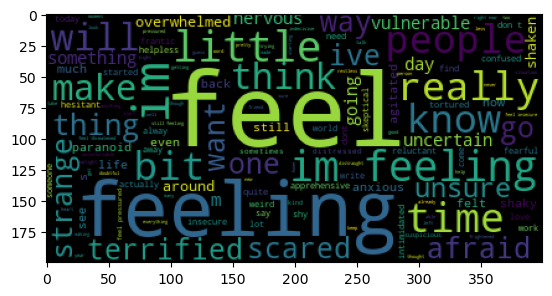

In [82]:
wc = WordCloud().generate(" ".join(gb.get_group('fear')['Comment']))
plt.imshow(wc)
plt.show()

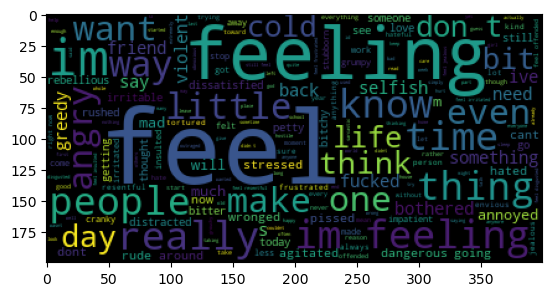

In [83]:
wc = WordCloud().generate(" ".join(gb.get_group('anger')['Comment']))
plt.imshow(wc)
plt.show()

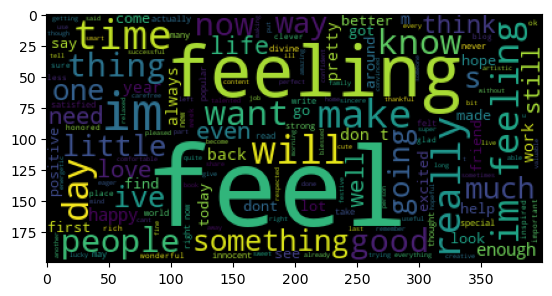

In [84]:
wc = WordCloud().generate(" ".join(gb.get_group('joy')['Comment']))
plt.imshow(wc)
plt.show()

In [85]:
### Finding other Featrure that is NO Of Words and NO of Characters for each emotion in dataset

In [86]:
df_eda['No_of_words'] = df_eda['Comment'].apply(lambda x: len(x.split()))
df_eda['No_of_Characters'] = df_eda['Comment'].apply(lambda x: len(" ".join(x).split()))

In [87]:
df_eda

,Comment,Emotion,No_of_words,No_of_Characters
0,i seriously hate one subject to death but now ...,fear,15,59
1,im so full of life i feel appalled,anger,8,27
2,i sit here to write i start to dig out my feel...,fear,29,103
3,ive been really angry with r and i feel like a...,joy,19,71
4,i feel suspicious if there is no one outside l...,fear,16,72
...,...,...,...,...
5932,i begun to feel distressed for you,fear,7,28
5933,i left feeling annoyed and angry thinking that...,anger,16,68
5934,i were to ever get married i d have everything...,joy,45,174
5935,i feel reluctant in applying there because i w...,fear,23,89


<Axes: ylabel='Frequency'>

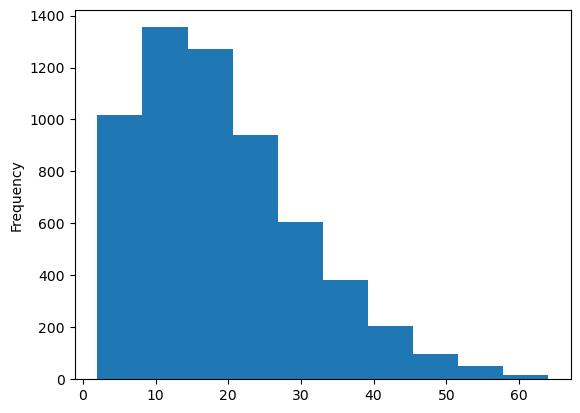

In [88]:
df_eda['No_of_words'].plot(kind = 'hist')

# 6. Feature Engineering

In [165]:
fv = df.iloc[:,0]
cv = df.iloc[:,1]
cv = cv.map({'fear':0,'anger':1,'joy':2})
fv

0       i seriously hate one subject to death but now ...
1                      im so full of life i feel appalled
2       i sit here to write i start to dig out my feel...
3       ive been really angry with r and i feel like a...
4       i feel suspicious if there is no one outside l...
                              ...                        
5932                   i begun to feel distressed for you
5933    i left feeling annoyed and angry thinking that...
5934    i were to ever get married i d have everything...
5935    i feel reluctant in applying there because i w...
5936    i just wanted to apologize to you because i fe...
Name: Comment, Length: 5937, dtype: object

In [166]:
final_pip

Pipeline(steps=[('Pre-process',
                 Pipeline(steps=[('Lower',
                                  FunctionTransformer(func=<function lowers at 0x0000023EB71F4A40>)),
                                 ('URL',
                                  FunctionTransformer(func=<function url at 0x0000023EBAC887C0>)),
                                 ('HTTPs',
                                  FunctionTransformer(func=<function html at 0x0000023EBAC89760>)),
                                 ('Special_characters',
                                  FunctionTransformer(func=<function special_char at 0x0000023EBAC89EE0>)),
                                 ('Advance',
                                  FunctionTransformer(func=<function lemma at 0x0000023EB4FE7A60>))])),
                ('Vectorizer', CountVectorizer())])

# 7.Training

## Finding Best ALPHA value using train,cv,test dataset

# Bernouli Navie Bayes 

In [167]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,random_state=2,stratify=cv)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=2,stratify=y_train)

In [168]:
# Feature Engineering
train = final_pip.fit_transform(x_train)
cv = final_pip.transform(x_cv)
test = final_pip.transform(x_test)

In [169]:
tr_error = []
for y in range(1,100):
    b = BernoulliNB(alpha=y)
    model = b.fit(train,y_train)  # Here model just calculated likelihoods and priors but not transform any value
    predicted_y = model.predict(train)
    tr_error.append(1-accuracy_score(predicted_y,y_train))

In [170]:
cv_error = []
for y in range(1,100):
    b = BernoulliNB(alpha=y)
    model = b.fit(train,y_train)
    predicted_y = model.predict(cv)
    cv_error.append(1-accuracy_score(predicted_y,y_cv))

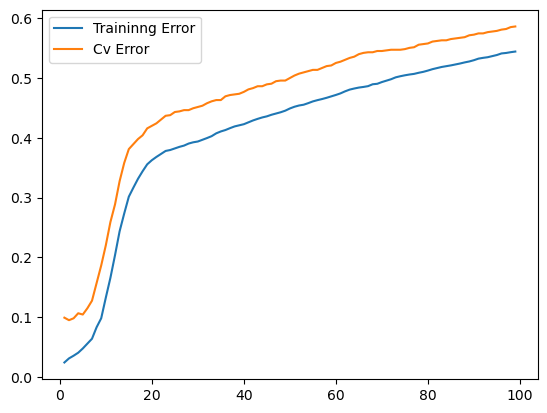

In [171]:
plt.plot(range(1,100),tr_error,label = "Traininng Error")
plt.plot(range(1,100),cv_error,label = "Cv Error")
plt.legend()
plt.show()

# Binary BOW - Testing

In [172]:
final_pip

Pipeline(steps=[('Pre-process',
                 Pipeline(steps=[('Lower',
                                  FunctionTransformer(func=<function lowers at 0x0000023EB71F4A40>)),
                                 ('URL',
                                  FunctionTransformer(func=<function url at 0x0000023EBAC887C0>)),
                                 ('HTTPs',
                                  FunctionTransformer(func=<function html at 0x0000023EBAC89760>)),
                                 ('Special_characters',
                                  FunctionTransformer(func=<function special_char at 0x0000023EBAC89EE0>)),
                                 ('Advance',
                                  FunctionTransformer(func=<function lemma at 0x0000023EB4FE7A60>))])),
                ('Vectorizer', CountVectorizer())])

In [173]:
test = final_pip.transform(x_test)

### Evalution


In [174]:
# Accuracy 
b = BernoulliNB(alpha=7)
model = b.fit(train,y_train)
accuracy_score(y_test,model.predict(test))


0.8316498316498316

In [175]:
# Classification Report
print(classification_report(y_test,model.predict(test)))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       388
           1       0.72      0.97      0.83       400
           2       0.91      0.81      0.86       400

    accuracy                           0.83      1188
   macro avg       0.86      0.83      0.83      1188
weighted avg       0.85      0.83      0.83      1188



In [176]:
# Confusion Metric
cm = confusion_matrix(y_test,model.predict(test))
cm

array([[275,  85,  28],
       [  7, 387,   6],
       [ 12,  62, 326]], dtype=int64)

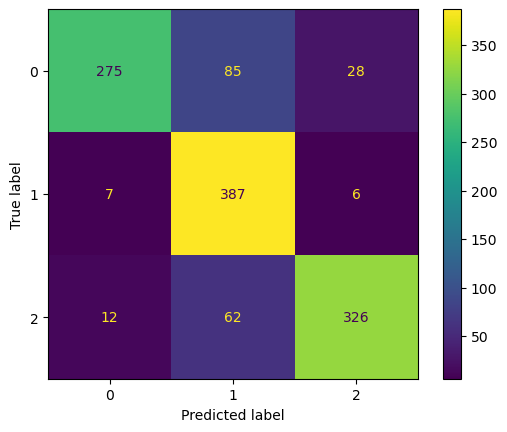

In [177]:
i =ConfusionMatrixDisplay(cm)
i.plot()
plt.show()

In [183]:
pr =model.predict_proba(test)[:,1]

In [185]:
# Roc_curve
fpr, tpr,_ = roc_curve(y_test, pr,pos_label=1)


In [192]:
fpr1,tpr1,_ = roc_curve(y_test,[0 for y in range(len(y_test))],pos_label=2)

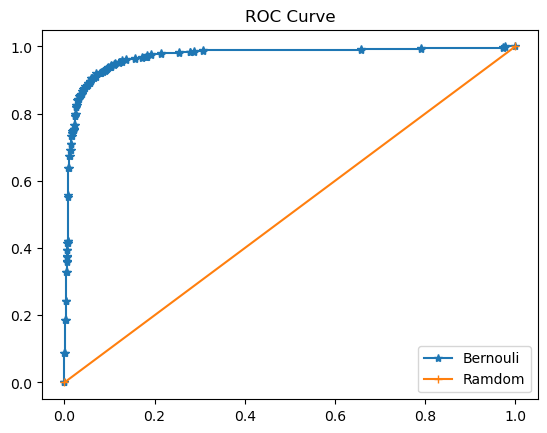

In [194]:
plt.plot(fpr,tpr,marker="*",label = 'Bernouli')
plt.plot(fpr1,tpr1,marker ="+",label ='Ramdom')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [202]:
pickle.dump(model,open(r"C:\Users\Pavan Kalyan\Desktop\Models\Emotion_model_Bernouli.pkl",'wb'))
pickle.dump(final_pip,open(r"C:\Users\Pavan Kalyan\Desktop\Models\Preprocess_Bernouli.pkl",'wb'))

# Multinomial Navie Bayes

In [203]:
fv = df.iloc[:,0]
cv = df.iloc[:,1]
cv = cv.map({'fear':0,'anger':1,'joy':2})
fv

0       i seriously hate one subject to death but now ...
1                      im so full of life i feel appalled
2       i sit here to write i start to dig out my feel...
3       ive been really angry with r and i feel like a...
4       i feel suspicious if there is no one outside l...
                              ...                        
5932                   i begun to feel distressed for you
5933    i left feeling annoyed and angry thinking that...
5934    i were to ever get married i d have everything...
5935    i feel reluctant in applying there because i w...
5936    i just wanted to apologize to you because i fe...
Name: Comment, Length: 5937, dtype: object

In [204]:
Pre_process_pip

Pipeline(steps=[('Lower',
                 FunctionTransformer(func=<function lowers at 0x0000023EB71F4A40>)),
                ('URL',
                 FunctionTransformer(func=<function url at 0x0000023EBAC887C0>)),
                ('HTTPs',
                 FunctionTransformer(func=<function html at 0x0000023EBAC89760>)),
                ('Special_characters',
                 FunctionTransformer(func=<function special_char at 0x0000023EBAC89EE0>)),
                ('Advance',
                 FunctionTransformer(func=<function lemma at 0x0000023EB4FE7A60>))])

In [205]:
final_pip_multinomial =Pipeline([('Pre-process',Pre_process_pip),('Vectorizer',CountVectorizer())])
final_pip_multinomial

Pipeline(steps=[('Pre-process',
                 Pipeline(steps=[('Lower',
                                  FunctionTransformer(func=<function lowers at 0x0000023EB71F4A40>)),
                                 ('URL',
                                  FunctionTransformer(func=<function url at 0x0000023EBAC887C0>)),
                                 ('HTTPs',
                                  FunctionTransformer(func=<function html at 0x0000023EBAC89760>)),
                                 ('Special_characters',
                                  FunctionTransformer(func=<function special_char at 0x0000023EBAC89EE0>)),
                                 ('Advance',
                                  FunctionTransformer(func=<function lemma at 0x0000023EB4FE7A60>))])),
                ('Vectorizer', CountVectorizer())])

In [206]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,random_state=2,stratify=cv)
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=0.2,random_state=2,stratify=y_train)

In [207]:
# Feature Engineering
train = final_pip_multinomial.fit_transform(x_train)
cv = final_pip_multinomial.transform(x_cv)


In [208]:
tr_error= []
for y in range(1,100):
    m = MultinomialNB(alpha=y)
    model = m.fit(train,y_train)
    predicted_y =model.predict(train)
    tr_error.append(1-accuracy_score(predicted_y,y_train))

In [209]:
cv_error =[]
for y in range(1,100):
    m = MultinomialNB(alpha=y)
    model = m.fit(train,y_train)
    predicted_y = model.predict(cv)
    cv_error.append(1-accuracy_score(predicted_y,y_cv))

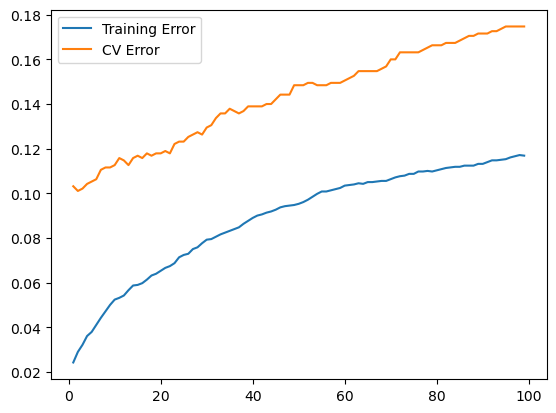

In [210]:
plt.plot(range(1,100),tr_error,label = 'Training Error')
plt.plot(range(1,100),cv_error,label = 'CV Error')
plt.legend()
plt.show()

# Testing and Evaluation

In [211]:
final_pip_multinomial

Pipeline(steps=[('Pre-process',
                 Pipeline(steps=[('Lower',
                                  FunctionTransformer(func=<function lowers at 0x0000023EB71F4A40>)),
                                 ('URL',
                                  FunctionTransformer(func=<function url at 0x0000023EBAC887C0>)),
                                 ('HTTPs',
                                  FunctionTransformer(func=<function html at 0x0000023EBAC89760>)),
                                 ('Special_characters',
                                  FunctionTransformer(func=<function special_char at 0x0000023EBAC89EE0>)),
                                 ('Advance',
                                  FunctionTransformer(func=<function lemma at 0x0000023EB4FE7A60>))])),
                ('Vectorizer', CountVectorizer())])

In [212]:
test = final_pip_multinomial.transform(x_test)

In [215]:
# accuracy
b = MultinomialNB(alpha=7)
model1 =b.fit(train,y_train)
p_y = model1.predict(test)
accuracy_score(p_y,y_test)

0.8804713804713805

In [216]:
# Classification Report
print(classification_report(y_test,model1.predict(test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       388
           1       0.86      0.90      0.88       400
           2       0.91      0.87      0.89       400

    accuracy                           0.88      1188
   macro avg       0.88      0.88      0.88      1188
weighted avg       0.88      0.88      0.88      1188



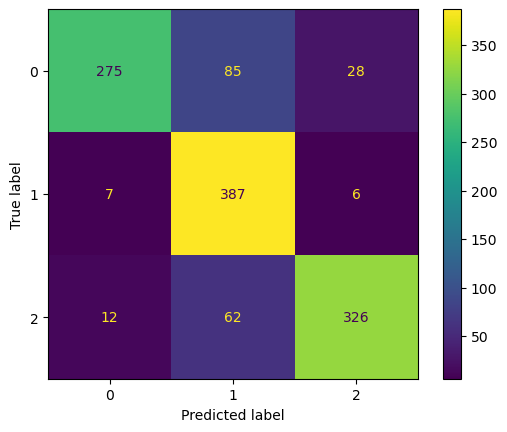

In [217]:
i =ConfusionMatrixDisplay(cm)
i.plot()
plt.show()

In [218]:
# Serialization
pickle.dump(model1,open(r"C:\Users\Pavan Kalyan\Desktop\Models\Emotion_model_Multinomial.pkl",'wb'))
pickle.dump(final_pip_multinomial,open(r"C:\Users\Pavan Kalyan\Desktop\Models\Preprocess_Multinomial.pkl",'wb'))